##### Copyright 2019 The TensorFlow Authors.

In [235]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [236]:
cwd = os.getcwd()

def preprocess_image(img_path):
    """Resize the image to (32, 32) and keep RGB channels."""
    try:
        img = Image.open(img_path).resize((32, 32))
        if img.mode != 'RGB':
            img = img.convert('RGB')  # Ensure image is in RGB mode
        return np.array(img)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Preprocess training data
train_img_folder = '/visual_results_train(2561)'
train_img_direc = cwd + train_img_folder
train_array_list = [preprocess_image(os.path.join(train_img_direc, img)) for img in os.listdir(train_img_direc)]
train_img_array = np.stack(train_array_list)
print(train_img_array.shape)

# Preprocess test data
test_img_folder = '/visual_results_test(656)'  
test_img_direc = cwd + test_img_folder
test_array_list = [preprocess_image(os.path.join(test_img_direc, img)) for img in os.listdir(test_img_direc)]
test_img_array = np.stack(test_array_list)
print(test_img_array.shape)



(2561, 32, 32, 3)
(656, 32, 32, 3)


In [237]:
import pandas as pd
import ast

def load_scp_codes_from_ptbxl(ptbxl_database):
    """Load unique scp_codes (labels) from a CSV file."""
    df = pd.read_csv(ptbxl_database)
    # Extract unique scp_codes and convert them to a list
    return df['scp_codes'].dropna().unique().astype(str).tolist()


def extract_string_from_scp_codes(s):
    """Extract diagnostic codes from a string representation of a dictionary."""
    try:
        # Convert string to dictionary
        code_dict = ast.literal_eval(s)
        # Extract keys (diagnostic codes) that have a non-zero value
        return [key for key, value in code_dict.items() if value > 0.0]
    except:
        return []
    

In [238]:
def load_ecg_id_from_ptbxl(ptbxl_database):
    """Load unique ecg_id (labels) from a CSV file."""
    df = pd.read_csv(ptbxl_database)
    # Extract unique ecg_id and convert them to a list
    return df['ecg_id'].dropna().tolist()

def load_common_ecg_id_scp_codes(ptbxl_database):
    """Load mapping of scp_codes to diagnostic_class."""
    df = pd.read_csv(ptbxl_database)
    return df.set_index('ecg_id')['scp_codes'].to_dict()

# Assuming there's a CSV (like scp_statements.csv) that maps scp_codes to their human-readable diagnostic classes
def load_mapping_from_scp_statements(scp_statements):
    df = pd.read_csv(scp_statements)
    return df.set_index('scp_codes')['diagnostic_class'].to_dict()


In [239]:
# Load the data
scp_codes_unrefined = load_scp_codes_from_ptbxl('ptbxl_database.csv')
all_extracted_codes = [extract_string_from_scp_codes(code) for code in scp_codes_unrefined]

ecg_id_to_scp_codes = load_common_ecg_id_scp_codes('ptbxl_database.csv')
scp_codes_to_diagnostic_class = load_mapping_from_scp_statements('scp_statements.csv')

# Create correspondence between ecg_id and diagnostic_class
ecg_id_to_diagnostic_class = {}
for ecg_id, scp_code_str in ecg_id_to_scp_codes.items():
    scp_codes = extract_string_from_scp_codes(scp_code_str)
    diagnostic_classes = [scp_codes_to_diagnostic_class[code] for code in scp_codes if code in scp_codes_to_diagnostic_class]
    ecg_id_to_diagnostic_class[ecg_id] = diagnostic_classes

# Demonstration outputs
print(scp_codes_unrefined)
print(all_extracted_codes)
print(ecg_id_to_scp_codes)
print(scp_codes_to_diagnostic_class)


["{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}", "{'NORM': 80.0, 'SBRAD': 0.0}", "{'NORM': 100.0, 'SR': 0.0}", "{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'NORM': 80.0, 'SARRH': 0.0}", "{'NORM': 100.0, 'SARRH': 0.0}", "{'AFLT': 100.0, 'ABQRS': 0.0, 'AFIB': 0.0}", "{'AFLT': 100.0}", "{'AFLT': 100.0, 'ABQRS': 0.0}", "{'NDT': 100.0, 'SR': 0.0}", "{'NST_': 100.0, 'DIG': 100.0, 'SR': 0.0}", "{'NORM': 80.0, 'SR': 0.0}", "{'LVH': 100.0, 'SR': 0.0}", "{'LPFB': 100.0, 'SR': 0.0}", "{'IMI': 15.0, 'LNGQT': 100.0, 'NST_': 100.0, 'DIG': 100.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'LAFB': 100.0, 'SR': 0.0}", "{'IRBBB': 100.0, 'RAO/RAE': 50.0, 'RVH': 35.0, 'SR': 0.0}", "{'IVCD': 100.0, 'SR': 0.0}", "{'LMI': 15.0, 'IVCD': 100.0, 'SR': 0.0}", "{'IRBBB': 100.0, 'SR': 0.0}", "{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'ASMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'NORM': 100.0, 'SBRAD': 0.0}", "{'AMI': 50.0, 'IRBBB': 100.0, 'SR': 0.0}", "{'NDT': 100.0, 'IRBBB': 100.0, 'SR': 0.0}", "{'ISCAL': 50.0, '1AVB': 100.0, 'SR'

In [240]:
print(ecg_id_to_diagnostic_class)
print(len(ecg_id_to_diagnostic_class))

{1: ['NORM'], 2: ['NORM'], 3: ['NORM'], 4: ['NORM'], 5: ['NORM'], 6: ['NORM'], 7: ['NORM'], 8: ['MI'], 9: ['NORM'], 10: ['NORM'], 11: ['NORM'], 12: ['NORM'], 13: ['NORM'], 14: ['NORM'], 15: ['NORM'], 16: ['NORM'], 17: [nan], 18: [nan], 19: ['NORM'], 20: [nan], 21: ['NORM'], 22: ['STTC'], 23: [nan], 24: ['NORM'], 25: ['NORM'], 26: ['STTC', 'STTC'], 27: ['NORM'], 28: ['STTC', 'STTC'], 29: ['NORM'], 30: ['HYP'], 31: ['NORM'], 32: ['CD'], 33: ['NORM'], 34: [nan], 35: ['NORM'], 36: ['NORM'], 37: ['NORM'], 38: ['NORM'], 39: ['MI', 'STTC', 'STTC', 'STTC'], 40: ['NORM'], 41: ['CD'], 42: ['NORM'], 43: ['NORM'], 44: ['NORM'], 45: ['CD', 'HYP', 'HYP'], 46: ['NORM'], 47: ['NORM'], 48: ['STTC'], 49: ['CD'], 50: ['MI', 'CD'], 51: ['NORM'], 52: ['CD'], 53: ['NORM'], 54: ['STTC'], 55: ['NORM'], 56: ['NORM'], 57: ['NORM'], 58: ['NORM'], 59: ['NORM'], 60: ['NORM'], 61: ['NORM'], 62: ['NORM'], 63: ['MI'], 64: ['NORM'], 65: ['CD'], 66: ['NORM'], 67: ['NORM'], 68: ['NORM'], 69: ['NORM'], 70: ['NORM'], 71: 

In [241]:
def extract_ecg_id_from_filename(filename):
    # Assuming the ECG ID is the entire filename before any extension
    return filename.split('.')[0]

# For training images:
train_ecg_ids = list(range(1, 2562))  # 2562 is exclusive
train_labels = [ecg_id_to_diagnostic_class.get(ecg_id, 'Unknown') for ecg_id in train_ecg_ids]
# Extract the first code from each sublist
first_codes_train_labels = [sublist[0] for sublist in train_labels]

print(first_codes_train_labels)
# For testing images:
test_ecg_ids = list(range(1, 657))  # 657 is exclusive
test_labels = [ecg_id_to_diagnostic_class.get(ecg_id, 'Unknown') for ecg_id in test_ecg_ids]
first_codes_test_labels = [sublist[0] for sublist in test_labels]
print(first_codes_test_labels)
# Print the shapes of the labels for confirmation

print(len(first_codes_train_labels))

print(len(first_codes_test_labels))


['NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', nan, nan, 'NORM', nan, 'NORM', 'STTC', nan, 'NORM', 'NORM', 'STTC', 'NORM', 'STTC', 'NORM', 'HYP', 'NORM', 'CD', 'NORM', nan, 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'CD', 'NORM', 'NORM', 'NORM', 'CD', 'NORM', 'NORM', 'STTC', 'CD', 'MI', 'NORM', 'CD', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'CD', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'HYP', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'MI', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'STTC', 'NORM', 'NORM', 'M

In [242]:
# Print Type and Shape Information
print("Type of train_img_array:", type(train_img_array))
print("Type of test_img_array:", type(test_img_array))
print("Shape of train_img_array:", train_img_array.shape)
print("Shape of test_img_array:", test_img_array.shape)
print("Type of train_labels:", type(first_codes_train_labels))
print("Type of test_labels:", type(first_codes_test_labels))
print("Shape of train_labels:", len(first_codes_train_labels))
print("Shape of test_labels:", len(first_codes_test_labels))
print(first_codes_train_labels)
print(first_codes_test_labels)
# Normalize pixel values to be between 0 and 1
train_images = train_img_array / 255.0
test_images = test_img_array / 255.0

# Print shapes after normalization
print("Shape of normalized train_images:", train_images.shape)
print("Shape of normalized test_images:", test_images.shape)




Type of train_img_array: <class 'numpy.ndarray'>
Type of test_img_array: <class 'numpy.ndarray'>
Shape of train_img_array: (2561, 32, 32, 3)
Shape of test_img_array: (656, 32, 32, 3)
Type of train_labels: <class 'list'>
Type of test_labels: <class 'list'>
Shape of train_labels: 2561
Shape of test_labels: 656
['NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', nan, nan, 'NORM', nan, 'NORM', 'STTC', nan, 'NORM', 'NORM', 'STTC', 'NORM', 'STTC', 'NORM', 'HYP', 'NORM', 'CD', 'NORM', nan, 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'CD', 'NORM', 'NORM', 'NORM', 'CD', 'NORM', 'NORM', 'STTC', 'CD', 'MI', 'NORM', 'CD', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'CD', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM',

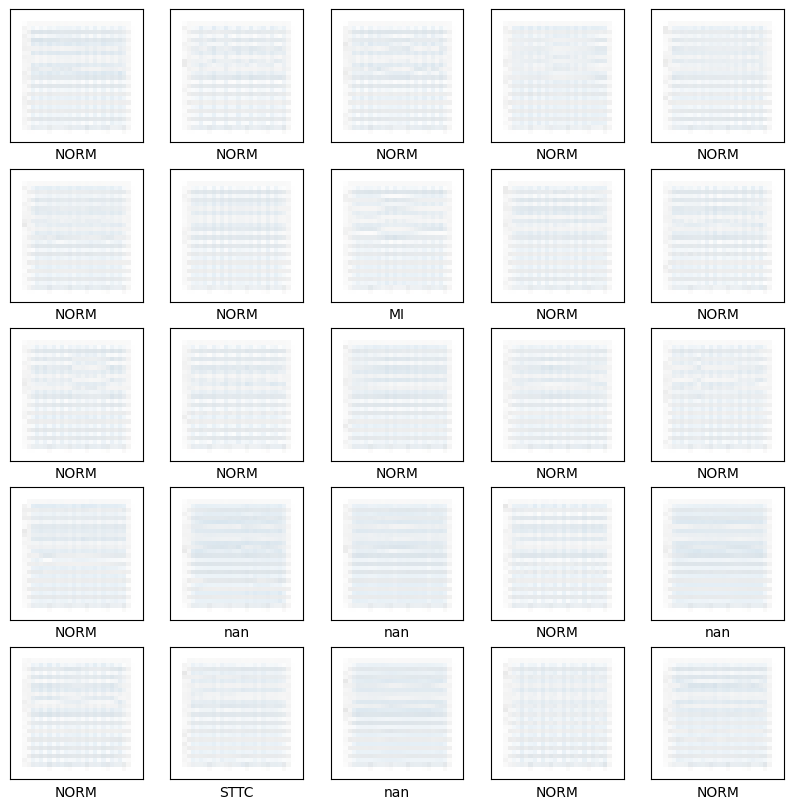

In [243]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')  # Added cmap='gray' for better visualization if the images are grayscale
    plt.xlabel(first_codes_train_labels[i])
plt.show()


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [244]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [245]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [246]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

Here's the complete architecture of your model:

In [247]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_16 (Flatten)        (None, 1024)            

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [248]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [249]:
print("Number of training images:", len(train_images))
print("Number of training labels:", len(first_codes_train_labels))
print("Number of training images:", len(test_images))
print("Number of training labels:", len(first_codes_test_labels))


Number of training images: 2561
Number of training labels: 2561
Number of training images: 656
Number of training labels: 656


In [250]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initial check for any mismatches in the length of data and labels
assert len(train_images) == len(first_codes_train_labels), "Initial mismatch in training data!"

# Filter out NaN values for the training dataset
valid_indices = [i for i, x in enumerate(first_codes_train_labels) if x == x and i < len(train_images)]
train_images = train_images[valid_indices]
first_codes_train_labels = [first_codes_train_labels[i] for i in valid_indices]

# Convert labels from string to integers using LabelEncoder
label_encoder = LabelEncoder()
first_codes_train_labels_encoded = label_encoder.fit_transform(first_codes_train_labels)
first_codes_train_labels_encoded = np.array(first_codes_train_labels_encoded)

# Handle NaN values and encode test labels using the same encoder
valid_indices_test = [i for i, x in enumerate(first_codes_test_labels) if x == x]
test_images = test_images[valid_indices_test]
first_codes_test_labels = [first_codes_test_labels[i] for i in valid_indices_test]
first_codes_test_labels_encoded = label_encoder.transform(first_codes_test_labels)
first_codes_test_labels_encoded = np.array(first_codes_test_labels_encoded)

# Fit the model using the processed data
history = model.fit(train_images, first_codes_train_labels_encoded, epochs=10, 
                    validation_data=(test_images, first_codes_test_labels_encoded))


Epoch 1/10
80/80 [==============================] - 2s 15ms/step - loss: 1.3591 - accuracy: 0.5344 - val_loss: 1.3506 - val_accuracy: 0.5559
Epoch 2/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3242 - accuracy: 0.5399 - val_loss: 1.3275 - val_accuracy: 0.5559
Epoch 3/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3203 - accuracy: 0.5399 - val_loss: 1.3138 - val_accuracy: 0.5559
Epoch 4/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3161 - accuracy: 0.5399 - val_loss: 1.3208 - val_accuracy: 0.5559
Epoch 5/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3260 - accuracy: 0.5399 - val_loss: 1.3246 - val_accuracy: 0.5559
Epoch 6/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3252 - accuracy: 0.5399 - val_loss: 1.3132 - val_accuracy: 0.5559
Epoch 7/10
80/80 [==============================] - 1s 13ms/step - loss: 1.3274 - accuracy: 0.5399 - val_loss: 1.3648 - val_accuracy: 0.5559
Epoch 8/10
80

### Evaluate the model

21/21 - 0s - loss: 1.3216 - accuracy: 0.5559 - 90ms/epoch - 4ms/step


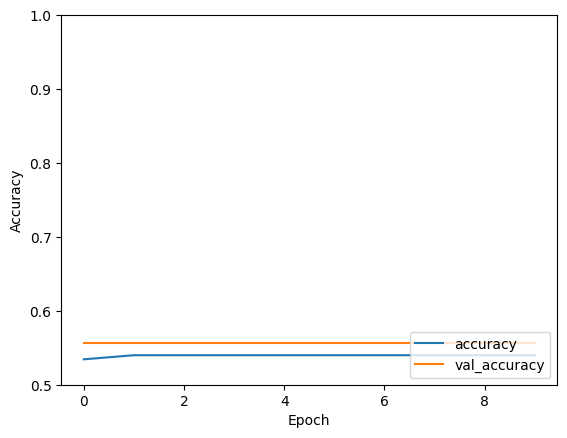

In [251]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, first_codes_test_labels_encoded, verbose=2)

In [252]:
print(test_acc)

0.5559006333351135


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.